# POSTTEST 6

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Menampilkan Dataset
df = pd.read_csv('Fifa 23 Players Data.csv')

# SPLIT DATASET
X = df.iloc[:,:-1] 
y = df.iloc[:,-1]

# Encoding Target
LE = LabelEncoder()
df['Overall'] = LE.fit_transform(df['Overall'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan Kolom Numerik dan Kategorikal
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Menggunakan OneHotEncoder Untuk Kolom Kategorikal
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Konversi Dataset Menjadi Float32
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Model Squential
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_encoded.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Menggunakan Callbacks
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            self.model.stop_training = True

# Pelatihan Model
call = MyCallback()
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_encoded, y_test),
    callbacks=[call]
)


C:\Users\NITRO 5\venv_C2-21\Ardi_130\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
232/232 [==============================] - 12s 46ms/step - loss: 714.9080 - accuracy: 0.0000e+00 - val_loss: 765.0627 - val_accuracy: 0.0000e+00
Epoch 2/20
232/232 [==============================] - 10s 42ms/step - loss: 713.2944 - accuracy: 0.0000e+00 - val_loss: 765.0596 - val_accuracy: 0.0000e+00
Epoch 3/20
232/232 [==============================] - 10s 43ms/step - loss: 713.2938 - accuracy: 0.0000e+00 - val_loss: 765.0586 - val_accuracy: 0.0000e+00
Epoch 4/20
232/232 [==============================] - 10s 44ms/step - loss: 713.2938 - accuracy: 0.0000e+00 - val_loss: 765.0585 - val_accuracy: 0.0000e+00
Epoch 5/20
232/232 [==============================] - 10s 44ms/step - loss: 713.2938 - accuracy: 0.0000e+00 - val_loss: 765.0585 - val_accuracy: 0.0000e+00
Epoch 6/20
232/232 [==============================] - 10s 42ms/step - loss: 713.2938 - accuracy: 0.0000e+00 - val_loss: 765.0585 - val_accuracy: 0.0000e+00
Epoch 7/20
232/232 [==============================] - 10s 41ms/s

### Model Sequential

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2903808   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2905921 (11.09 MB)
Trainable params: 2905921 (11.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluasi Model

In [2]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])

116/116 [==============================] - 1s 5ms/step - loss: 765.0585 - accuracy: 0.0000e+00
Test loss     : 765.0585327148438
Test accuracy : 0.0


### Grafik Perbandingan Accuracy dan Loss dari Train dan Test

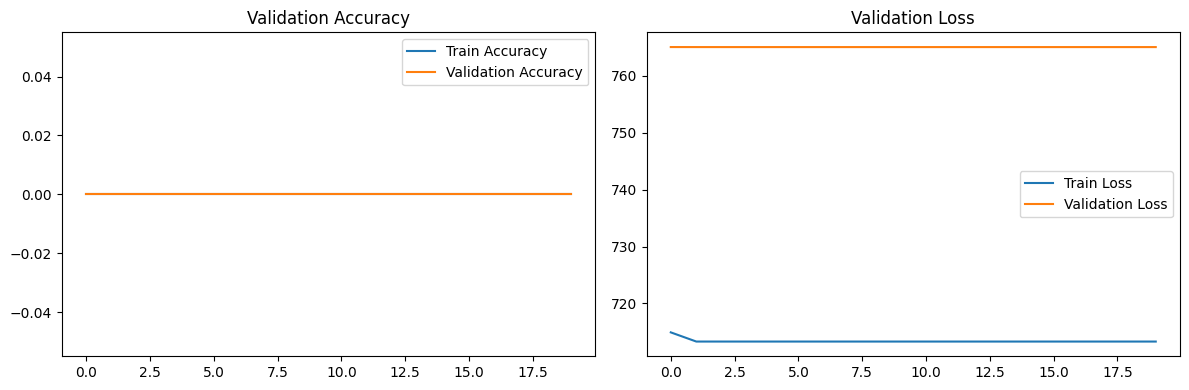

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Validation Loss')

plt.tight_layout()
plt.show()